In [4]:
# K-means clustering 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import seaborn as sns


In [6]:
iris=sns.load_dataset('iris')

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
x_iris = iris.drop(['species'],axis=1)
y_iris = iris["species"] 

In [11]:
k_means_fit = KMeans(n_clusters=3,max_iter=300) 
k_means_fit.fit(x_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
 print ("\nK-Means Clustering - Confusion Matrix\n\n",
        pd.crosstab(y_iris, k_means_fit.labels_,
                    rownames = ["Actuall"],colnames = ["Predicted"]) ) 
print ("\nSilhouette-score: %0.3f" % silhouette_score(x_iris, k_means_fit.labels_, metric='euclidean'))


K-Means Clustering - Confusion Matrix

 Predicted    0   1   2
Actuall               
setosa      50   0   0
versicolor   0  48   2
virginica    0  14  36

Silhouette-score: 0.553


In [13]:
for k in range(2,10): 
    k_means_fitk = KMeans(n_clusters=k,max_iter=300) 
    k_means_fitk.fit(x_iris) 
    print ("For K value",k,",Silhouette-score: %0.3f" % silhouette_score(x_iris, k_means_fitk.labels_, metric='euclidean'))

For K value 2 ,Silhouette-score: 0.681
For K value 3 ,Silhouette-score: 0.553
For K value 4 ,Silhouette-score: 0.498
For K value 5 ,Silhouette-score: 0.489
For K value 6 ,Silhouette-score: 0.365
For K value 7 ,Silhouette-score: 0.357
For K value 8 ,Silhouette-score: 0.360
For K value 9 ,Silhouette-score: 0.317


Following code is used to perform sensitivity analysis to check how many number of clusters does actually provide better explanation of segments:

The silhouette coefficient values in the preceding results shows that K value 2 and K value 3 have better scores than all the other values. As a thumb rule, we need to take the next K value of the highest silhouette coefficient. Here, we can say that K value 3 is better. In addition, we also need to see the average within cluster variation value and elbow plot before concluding the optimal K value.



In [14]:
# Avg. within-cluster sum of squares 
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(x_iris) for k in K] 
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(x_iris, centrds, 'euclidean') for centrds in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k] 
dist = [np.min(D,axis=1) for D in D_k] 
avgWithinSS = [sum(d)/x_iris.shape[0] for d in dist]

In [15]:
# Total with-in sum of square
wcss = [sum(d**2) for d in dist] 
tss = sum(pdist(x_iris)**2)/x_iris.shape[0] 
bss = tss-wcss

Text(0, 0.5, 'Average within-cluster sum of squares')

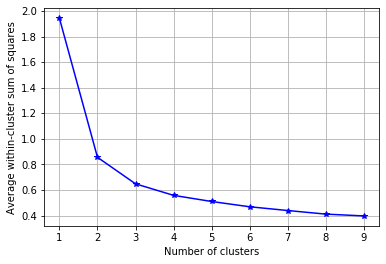

In [23]:
# elbow curve - Avg. within-cluster sum of squares 
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-') 
plt.grid(True) 
plt.xlabel('Number of clusters') 
plt.ylabel('Average within-cluster sum of squares')


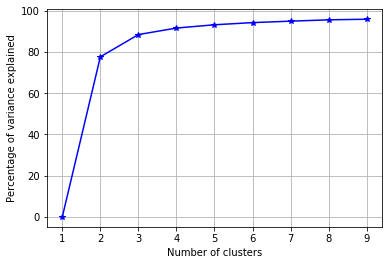

In [27]:
# elbow curve - percentage of variance explained 
fig = plt.figure() 
ax = fig.add_subplot(111) 
ax.plot(K, bss/tss*100, 'b*-') 
plt.grid(True) 
plt.xlabel('Number of clusters') 
plt.ylabel('Percentage of variance explained') 
plt.show()

From the elbow plot, it seems that at the value of three, the slope changes drastically. Here, we can select the optimal k-value as three.

Last but not least, the total percentage of variance explained value should be greater than 80 percent to decide the optimal number of clusters. Even here, a k-value of three seems to give a decent value of total variance explained. Hence, we can conclude from all the preceding metrics (silhouette, average within cluster variance, and total variance explained), that three clusters are ideal. 